In [1]:
include("Chapter 8 Snippets.jl")
using Distributions
using Statistics
using Random
using DataFrames
using StatsBase
using Plots


(process:6884): GLib-GIO-WARNING **: 01:59:08.378: Unexpectedly, UWP app `30008NitroOfficeDVDApp.NebulaeBookReader_2.1.3.0_x86__k9060n443y9rm' (AUMId `30008NitroOfficeDVDApp.NebulaeBookReader_k9060n443y9rm!App') supports 15 extensions but has no verbs


# Max Sharpe Ratio Experiment
Validates the False Strategy Theorem experimentally

In [2]:
nTrials = round.(exp10.(range(1, stop=3, length=20)))
sort!(nTrials)
sr0 = DataFrame(nT = nTrials, ExpectedMaxSR = [expectedMaxSharpeRatio(i, 0, 1) for i in nTrials])
sr1 = generatedMaxSharpeRatio(100, nTrials, 1, 0)
print()

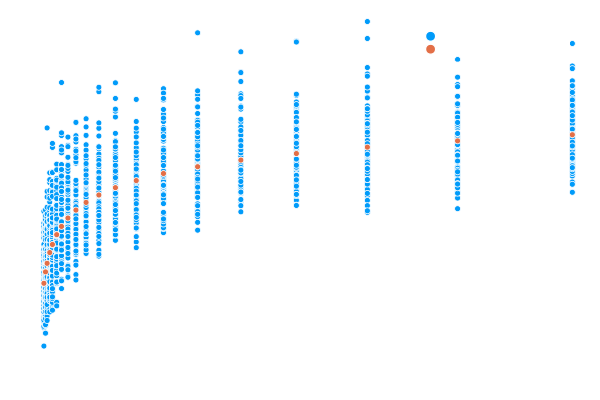

In [9]:
scatter(sr1.nTrials, sr1.maxSharpeRatio, label = "Experiment", background = :transparent)
scatter!(sr0.nT, sr0.ExpectedMaxSR, label = "Expected Max SR")
xaxis!("nTrials")

# Mean and standard deviation of the predicted errors
Calculates mean and standard deviation of the predicted errors

In [4]:
nTrials = round.(exp10.(range(1, stop=4, length=40)))
sort!(nTrials)
stats = meanAndStdError(1E3, 1E2, nTrials, 1, 0)

,meanErr,nTrials,stdErr
,Float64,Float64,Float64
1,-0.00739009,10.0,0.0
2,0.00101665,12.0,0.0
3,0.000601307,14.0,0.0
4,0.00251539,17.0,0.0
5,0.00293793,20.0,0.0
6,-0.0163439,24.0,0.0
7,0.000934887,29.0,0.0
8,-0.00388905,35.0,0.0
9,-0.00846044,41.0,0.0


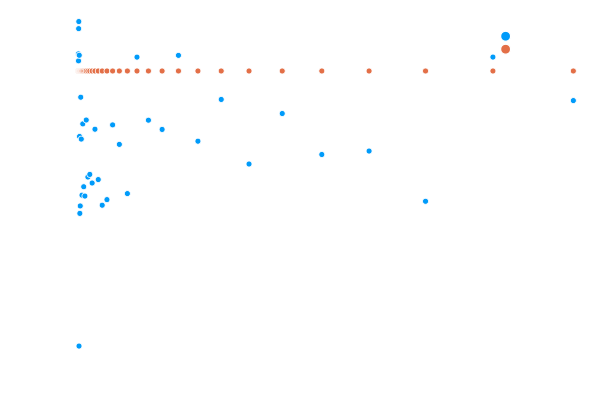

In [10]:
using Plots
Plots.scatter(nTrials[2:end], [stats.meanErr[2:end], stats.stdErr[2:end]], label = ["Mean" "Std"], xaxis = "nTrials", background = :transparent)

# Type I error probability
Calculates type I error probability of stratgies

In [6]:
t, skew, kurt, k, freq=1250, -3, 10, 10, 250
sr = 1.25 / freq ^ 0.5
sr_ = 1 / freq ^ 0.5
z = estimatedSharpeRatioZStatistics(sr, t, 0, skew, kurt)
α_k = strategyType1ErrorProbability(z, k)
println(α_k)

0.060760769078662125


# Type II error probability
Calculates type II error probability of stratgies

In [7]:
t, skew, kurt, k, freq = 1250, -3, 10, 10, 250
sr = 1.25 / freq ^ 0.5
sr_ = 1 / freq ^ 0.5
z = estimatedSharpeRatioZStatistics(sr, t, 0, skew, kurt)
α_k = strategyType1ErrorProbability(z, k)
θ = thetaForType2Error(sr, t, sr_, skew, kurt)
β = strategyType2ErrorProbability(α_k, k, θ)
β_k = β^k
print(β_k)

0.024928646400446335

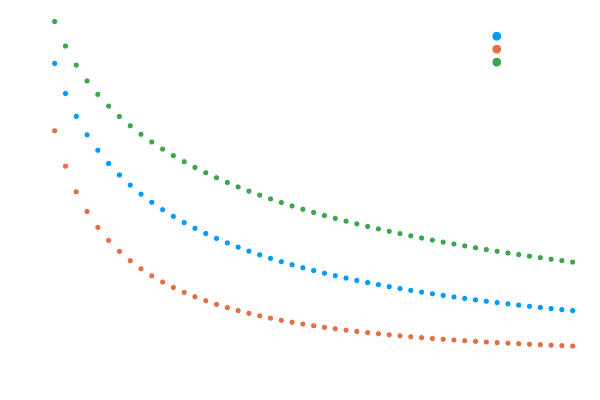

In [3]:
function calculateBeta(α, k)
    t, skew, kurt, freq = 1250, -3, 10, 250
    sr = 1.25 / freq ^ 0.5
    sr_ = 1 / freq ^ 0.5
    θ = thetaForType2Error(sr, t, sr_, skew, kurt)
    β = strategyType2ErrorProbability(α, k, θ)
    β_k = β^k
    return β_k
end    

β1 = [calculateBeta(0.01, i) for i in 1:0.5:25]
β2 = [calculateBeta(0.025, i) for i in 1:0.5:25]
β3 = [calculateBeta(0.005, i) for i in 1:0.5:25]

scatter(1:0.5:25, [β1, β2, β3], label = ["Beta 1" "Beta 2" "Beta 3"], xaxis = "Number of trials", background = :transparent)